In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import seaborn as sns

In [19]:
df = pd.read_csv('sentiments.csv')
df_topics = pd.read_csv('topics-quantified_revised24.csv', header=0, index_col=0)
df=df.drop('Unnamed: 0.1', axis=1)
df=df.drop('Unnamed: 0', axis=1)
df.head()

,aid,paper,author,date,url,sent,p_pos,p_neg
0,wsj0,wsj,"['Natalie Andrews', 'Louise Radnofsky', 'Krist...",NaN,https://www.wsj.com/articles/trump-calls-meeti...,pos,0.642044,0.357956
1,wsj1,wsj,"['Sarah Krouse', 'Sarah.Krouse Wsj.Com']",NaN,https://www.wsj.com/articles/blackrock-goes-pu...,pos,0.508808,0.491192
2,wsj2,wsj,"['Sarah Nassauer', 'Sarah.Nassauer Wsj.Com']",NaN,https://www.wsj.com/articles/gun-makers-strate...,pos,0.650000,0.350000
3,wsj3,wsj,[],NaN,http://www.wsj.com/video/how-student-survivors...,pos,0.976332,0.023668
4,wsj4,wsj,"['Heather Haddon', 'Google', 'Heather.Haddon W...",NaN,https://www.wsj.com/articles/kroger-to-stop-se...,pos,0.739436,0.260564


In [22]:
df_sent = df[(df.p_pos >= 0.65) | (df.p_neg >= 0.65)]
df_sent['positive']= np.where(df_sent['p_pos']>=0.65, 1, 0)
df_sent['negative']= np.where(df_sent['p_neg']>=0.65, 1, 0)
df_sent.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,aid,paper,author,date,url,sent,p_pos,p_neg,positive,negative
3,wsj3,wsj,[],NaN,http://www.wsj.com/video/how-student-survivors...,pos,0.976332,0.023668,1,0
4,wsj4,wsj,"['Heather Haddon', 'Google', 'Heather.Haddon W...",NaN,https://www.wsj.com/articles/kroger-to-stop-se...,pos,0.739436,0.260564,1,0
5,wsj5,wsj,"['Jason L. Riley', 'Jason.Riley Wsj.Com']",NaN,https://www.wsj.com/articles/gun-control-misse...,pos,0.999709,0.000291,1,0
6,wsj6,wsj,"['Vanessa Fuhrmans', 'Rachel Feintzeig', 'Vane...",NaN,https://www.wsj.com/articles/ceos-choose-sides...,pos,0.739436,0.260564,1,0
7,wsj7,wsj,"['Jon Kamp', 'Shibani Mahtani', 'Jon.Kamp Wsj....",NaN,https://www.wsj.com/articles/states-consider-l...,pos,0.999902,0.000098,1,0


In [30]:
grp=df_sent.groupby('paper').sum()
grp['neg_ratio'] = (grp['negative']/(grp['positive']+grp['negative']))*100

In [31]:
grp

,p_pos,p_neg,positive,negative,neg_ratio
paper,,,,,
blaze,304.059131,121.940869,327,99,23.239437
breitbart,240.548730,95.451270,252,84,25.000000
fox,251.689687,129.310313,264,117,30.708661
huffpo,226.523674,70.476326,246,51,17.171717
inforwars,179.868102,74.131898,184,70,27.559055
msnbc,301.691989,97.308011,321,78,19.548872
nation,70.712675,133.287325,27,177,86.764706
npr,243.713300,80.286700,255,69,21.296296
nyt,279.576987,86.423013,306,60,16.393443


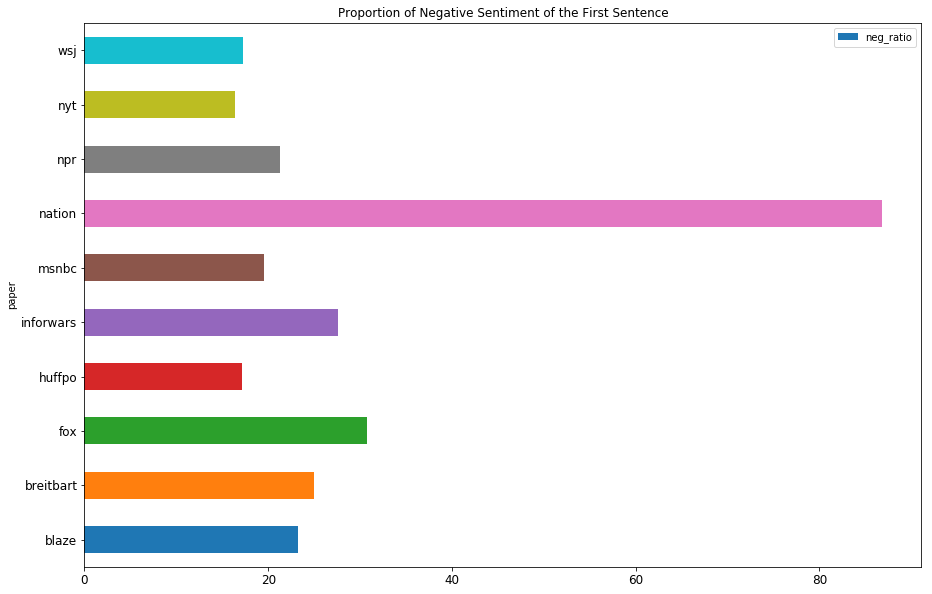

In [34]:
grp['neg_ratio'].plot(kind='barh', title ="Proportion of Negative Sentiment of the First Sentence", figsize=(15, 10), legend=True, fontsize=12)

[Text(0,0,'huffpo'),
 Text(0,0,'nation'),
 Text(0,0,'wsj'),
 Text(0,0,'breitbart'),
 Text(0,0,'inforwars'),
 Text(0,0,'blaze'),
 Text(0,0,'npr'),
 Text(0,0,'fox'),
 Text(0,0,'msnbc'),
 Text(0,0,'nyt')]

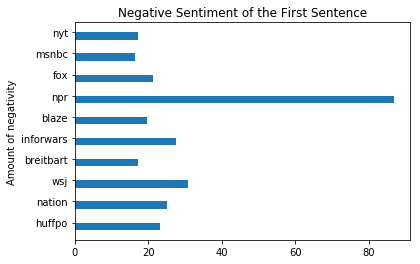

In [32]:

ind = np.arange(len(grp['neg_ratio']))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.barh(ind - width/2, grp['neg_ratio'], width)

ax.set_ylabel('Amount of negativity')
ax.set_title('Negative Sentiment of the First Sentence')
ax.set_yticks(ind)
ax.set_yticklabels(papers)


In [33]:
foxs=df[df['paper']=='fox']
huffpos = df[df['paper']=='huffpo']

In [ ]:
huffpos.plot.line(x=huffpos.date, y='p_neg', figsize=(12,3))

In [ ]:
nprs=df[df['paper']=='npr']
nprs.head()

In [ ]:
nprs.plot.line(x=nprs.date, y='p_pos', figsize=(12,3))

In [ ]:
fox_pos=df[(df['paper']=='fox') & (df['p_pos']>.75)]

In [ ]:
df_content = pd.read_csv('cleandataset.csv', header=0, index_col=0)
df_content.head()

In [ ]:
df_content_fox = df_content[df_content['paper']=='fox']
df_content_fox.head()

In [ ]:
#join this dataset on the aid, but from df_content_fox, only keep content & clean content